In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.ticker as ticker
from scipy.integrate import simps


In [2]:
def get_simulation_data(df):
    df['simulation'] = 0
    times = df['time'].unique()
    min_time_with_eigth_balls = df.groupby('iter').agg({'ball_id':'count', 'time':'first'}).query('ball_id == 8')['time'].min()
    return {
        'dataframe': df,
        'final_time': times.max(),
        'eigth_balls_final_time': min_time_with_eigth_balls,
    }

In [3]:
    BASE_PATH = '../tp4/out/pool/yposition'
    path = f"{BASE_PATH}/pool_y42.00_i0.csv"
    df = pd.read_csv(path)
    df = get_simulation_data(df)
    print(df['final_time'])
    print(df['eigth_balls_final_time'])

10.0
nan


In [4]:
def plot_map(name,plot_map, xlabel, ylabel, log_scale):
    positions = [position for position in plot_map.keys()]
    values = [value[0] for value in plot_map.values()]
    errors = [value[1] for value in plot_map.values()]
        
    plt.errorbar(positions, values, yerr=errors, fmt='o', color='black', ecolor='red', capsize=3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if log_scale:
        plt.yscale("log")
    plt.grid(True)
    plt.savefig(name)
    plt.clf()

In [9]:
# funcion que grafica el observable en funcion de la coordenada Y
# en que se ubica la pelota blanca. Se puede graficar el tiempo en 
# desaparecen todas las pelotas pasando como parametro 'last_event_time', 
# y con 'max_time_with_two_balls'el máximo tiempo para el que hay dos pelo
# tas en el tablero.

def plot_observable(criteria, log_scale):
    path = r'../tp4/out/pool/yposition'
    lista = ['42.00','45.50','49.00','52.50','56.00',]
    position_map = {}
    for position in lista:
        regex = '*y'+ position+'_i*.csv'
        files = Path(path).glob(regex)
        dfs = [pd.read_csv(f) for f in files]
        
        time_list = []
        for df in dfs:
            simulation_data = get_simulation_data(df)
            final_time = simulation_data[criteria]
            time_list.append(final_time)

        position_map[position] = (np.mean(time_list), np.std(time_list))
    print(position_map)
    plot_map('PositionVS'+criteria+'.png',position_map,'Coordenada Y','Tiempo de finalización (s)', log_scale)
    

{'42.00': (6.0, 0.0), '45.50': (6.0, 0.0), '49.00': (6.0, 0.0), '52.50': (6.0, 0.0), '56.00': (6.0, 0.0)}
{'42.00': (nan, nan), '45.50': (nan, nan), '49.00': (nan, nan), '52.50': (nan, nan), '56.00': (nan, nan)}


StopIteration: 

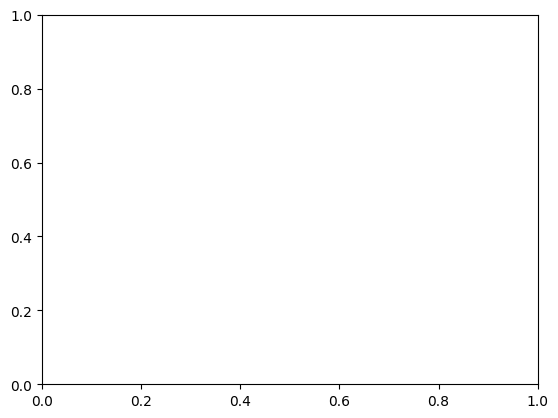

In [11]:
plot_observable('final_time',True)
plot_observable('eigth_balls_final_time', True)